BeautifulSoup Cheng Jing
========

In [1]:
#import packages
import bs4
from bs4 import BeautifulSoup
import urllib.request
import re
import pandas as pd

In [2]:
import time
import random

In [38]:
rank = []
name = []
rate = []
review = []
phone = []
address = []
district = []

In [4]:
tag = "lemon--div__373c0__1mboc largerScrollablePhotos__373c0__3FEIJ arrange__373c0__UHqhV border-color--default__373c0__2oFDT"
right_tag ="lemon--div__373c0__1mboc container__373c0__19wDx u-padding-l2 border-color--default__373c0__2oFDT text-align--right__373c0__3fmmn"
district_tag = "lemon--div__373c0__1mboc u-space-b1 border-color--default__373c0__2oFDT"
phone_tag = "lemon--p__373c0__3Qnnj text__373c0__2pB8f text-color--normal__373c0__K_MKN text-align--right__373c0__3ARv7"

In [5]:
def get_next_link(html):  #Search the link of the next page
    ourUrl=urllib.request.urlopen(html)
    soup=BeautifulSoup(ourUrl,'html.parser')
    link = 'https://www.yelp.com/' + soup.find('a',{'class':re.compile('next-link')})['href']
    return link

In [32]:
def metadata_extract(html):
    time.sleep(2.9+3*random.random())   #To avoid getting blocked by Yelp
    url = urllib.request.urlopen(html)
    soup = BeautifulSoup(url,'html.parser')
    content = soup.find_all('div',{'class':tag}) #locate all the search results in one page
    for i in range(1,len(content)):              #Collect information separately
        try:
            rank.append(content[i].find('p').text.split('.\xa0')[0])
        except:
            rank.append('None')
        try:
            name.append(content[i].find('p').text.split('.\xa0')[1])
        except:
            name.append('None')
        try:
            rate.append(content[i].find('div',{'class':re.compile('i-stars')})['aria-label'])
        except:
            rate.append('None')
        try:
            review.append(content[i].find('span',{'class':re.compile('reviewCount')}).text)
        except:
            review.append('None')
        try:
            phone.append(content[i].find('p',{'class':phone_tag}).text)
        except:
            phone.append('None')
        try:
            address.append(content[i].find('address').text)
        except:
            address.append('None')
        try:
            district.append(content[i].find('div',{'class':district_tag}).text)
        except:
            district.append('None')

    return rank,name,rate,review,phone,address,district

In [39]:
link='https://www.yelp.com/search?find_desc=Ice%20Cream&find_loc=10023'
for count in range(10):
    metadata_extract(link)
    link = get_next_link(link)
    print(link)
df = pd.DataFrame({'rank':rank,'name':name,'rate':rate,'review':review,'phone':phone,'address':address,'district':district})
df.to_csv('yelp_icecream3.csv',index=False,sep=',')


https://www.yelp.com//search?find_desc=Ice%20Cream&find_loc=10023&start=10
https://www.yelp.com//search?find_desc=Ice%20Cream&find_loc=10023&start=20
https://www.yelp.com//search?find_desc=Ice%20Cream&find_loc=10023&start=30
https://www.yelp.com//search?find_desc=Ice%20Cream&find_loc=10023&start=40
https://www.yelp.com//search?find_desc=Ice%20Cream&find_loc=10023&start=50
https://www.yelp.com//search?find_desc=Ice%20Cream&find_loc=10023&start=60
https://www.yelp.com//search?find_desc=Ice%20Cream&find_loc=10023&start=70
https://www.yelp.com//search?find_desc=Ice%20Cream&find_loc=10023&start=80
https://www.yelp.com//search?find_desc=Ice%20Cream&find_loc=10023&start=90
https://www.yelp.com//search?find_desc=Ice%20Cream&find_loc=10023&start=100


In [40]:
df

,rank,name,rate,review,phone,address,district
0,1,Emack and Bolio’s,4 star rating,286 reviews,(212) 362-2747,389 Amsterdam Ave,Upper West Side
1,2,Van Leeuwen Ice Cream,4.5 star rating,23 reviews,(646) 368-9195,253 Columbus Ave,Upper West Side
2,3,Grom,4 star rating,594 reviews,(212) 974-3444,1796 Broadway,Midtown West
3,4,Van Leeuwen Ice Cream Truck,3.5 star rating,118 reviews,(718) 701-1630,None,Upper West Side
4,5,Van Leeuwen Ice Cream,3.5 star rating,121 reviews,(646) 952-0311,448 Amsterdam Ave,Upper West Side
...,...,...,...,...,...,...,...
94,96,Parm,3.5 star rating,521 reviews,(212) 776-4921,235 Columbus Ave,Upper West Side
95,97,Lincoln Ristorante,4 star rating,562 reviews,(212) 359-6500,142 W 65th St,Upper West Side
96,98,Santa Fe,None,None,(212) 724-0822,72 W 69th St,Upper West Side
97,99,Sushi Power,None,None,(212) 555-7895,1 Columbus Pl,Hell's Kitchen


# There are 99 records because no.60 record is lost.
# Check all the records in file "yelp_icecream3.csv"

In [42]:
df1 = df.groupby('district')

In [52]:
list = df1.size()

In [72]:
list

district
                     2
Hell's Kitchen      11
Midtown East         9
Midtown West         8
Theater District     6
Upper East Side     11
Upper West Side     52
dtype: int64

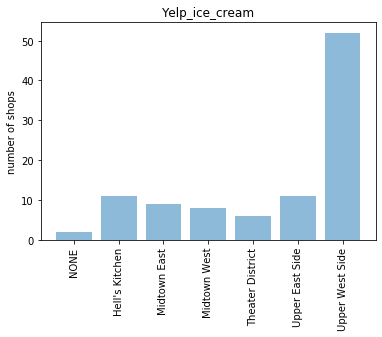

In [163]:
import numpy as np
import matplotlib.pyplot as plt
objects = ["NONE","Hell's Kitchen","Midtown East","Midtown West","Theater District","Upper East Side","Upper West Side"]
y_pos = np.arange(len(objects))
performance = np.array(list)

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('number of shops')
plt.title('Yelp_ice_cream')
plt.xticks(rotation=90)
plt.show()


# Upper west side has the biggest amount of shops
### "None" is the shop without "district" value, we should ignore it.

In [84]:
for i in range(len(df['rate'])):
    if df['rate'][i] != None:
        df['rate'][i] = df['rate'][i].split(' ')[0]

In [94]:
df_monkey = df.copy()

In [111]:
df3 = df_monkey[df_monkey['rate'] != "None"]

In [147]:
df4 = df3.groupby('district').mean()

In [164]:
df4

,rate
district,
,4.250000
Hell's Kitchen,4.000000
Midtown East,3.944444
Midtown West,3.937500
Theater District,3.916667
Upper East Side,3.681818
Upper West Side,3.862745


In [ ]:
x=df4
plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

In [143]:
df3['rate']= df3['rate'].astype(float)

E:\jesse\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


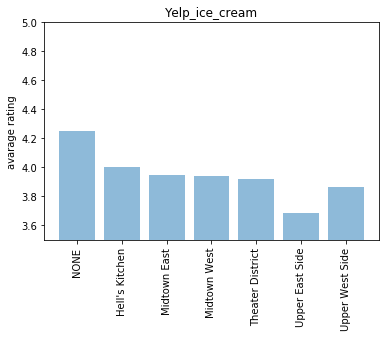

<Figure size 432x288 with 0 Axes>

In [168]:
objects = ["NONE","Hell's Kitchen","Midtown East","Midtown West","Theater District","Upper East Side","Upper West Side"]
y_pos = np.arange(len(objects))
performance = np.array(df4['rate'])

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('avarage rating')
plt.title('Yelp_ice_cream')
plt.xticks(rotation=90)

plt.ylim(3.5, 5)
plt.show()

# Hell's Kitchen has the highest average rates.
### "None" is the shop without "district" value, we should ignore it.